#Connect Google Drive

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Cx_Feedback_Analysis_System/gender
! ls

/content/drive/My Drive/Cx_Feedback_Analysis_System/gender
dataset  model


# Import Libraries/ Functions

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import tensorflow as tf

from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Dropout, BatchNormalization, Flatten, Dense, Input, Activation
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Import Dataset



In [ ]:
path = "/content/drive/My Drive/Cx_Feedback_Analysis_System/gender/dataset/UTKFace"

pixels = []
gender = []

for img in os.listdir(path):
    genders = img.split("_")[1]
    img = cv2.imread(os.path.join(path, img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100))
    pixels.append(np.array(img))
    gender.append(np.array(genders))

pixels = np.array(pixels)
gender = np.array(gender, np.uint64)

In [ ]:
len(pixels)

23758

In [ ]:
len(gender)

23758

# Split Train / Test

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(pixels, gender, test_size=0.2, random_state=100)

# Normalize Data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN
x_train = x_train.reshape(-1, 100, 100, 1)
x_test = x_test.reshape(-1, 100, 100, 1)

In [ ]:
len(x_train)

19006

In [ ]:
len(x_test)

4752

# Define CNN Architecture with Overfitting Fixes

In [ ]:

input_layer = Input(shape=(100, 100, 1))

conv1 = Conv2D(32, (3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.01))(input_layer)
conv1 = BatchNormalization()(conv1)
conv1 = Activation('relu')(conv1)
conv1 = Dropout(0.3)(conv1)
pool1 = MaxPooling2D(pool_size=(2,2))(conv1)

conv2 = Conv2D(64, (3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.01))(pool1)
conv2 = BatchNormalization()(conv2)
conv2 = Activation('relu')(conv2)
conv2 = Dropout(0.3)(conv2)
pool2 = MaxPooling2D(pool_size=(2,2))(conv2)

conv3 = Conv2D(128, (3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.01))(pool2)
conv3 = BatchNormalization()(conv3)
conv3 = Activation('relu')(conv3)
conv3 = Dropout(0.3)(conv3)
pool3 = MaxPooling2D(pool_size=(2,2))(conv3)

conv4 = Conv2D(256, (3,3), padding='same', strides=(1,1), kernel_regularizer=l2(0.01))(pool3)
conv4 = BatchNormalization()(conv4)
conv4 = Activation('relu')(conv4)
conv4 = Dropout(0.3)(conv4)
pool4 = MaxPooling2D(pool_size=(2,2))(conv4)

flatten = Flatten()(pool4)

dense_1 = Dense(128, activation='relu')(flatten)
dense_1 = Dropout(0.5)(dense_1)

output_layer = Dense(2, activation="softmax")(dense_1)

In [ ]:
model = Model(inputs=input_layer, outputs=output_layer)
model.compile(optimizer=Adam(learning_rate=0.001), loss="sparse_categorical_crossentropy", metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 100, 100, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 100, 100, 32)        │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 100, 100, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 100, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 50, 50, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 50, 50, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 50, 50, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50, 50, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 25, 25, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 25, 25, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 25, 25, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 12, 12, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 12, 12, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,569,794 (5.99 MB)

 Trainable params: 1,568,834 (5.98 MB)

 Non-trainable params: 960 (3.75 KB)

# Data Augmentation

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)
datagen.fit(x_train)

# Callbacks: Early Stopping & Learning Rate Decay

In [ ]:
model_path = "/content/drive/My Drive/Cx_Feedback_Analysis_System/gender/model/gender_model_new_final.keras"

checkpointer = ModelCheckpoint(model_path, monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', save_freq='epoch')
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

callbacks = [checkpointer, early_stopping, lr_scheduler]

# Model Training

In [ ]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=32),
                    validation_data=(x_test, y_test),
                    epochs=30,
                    callbacks=callbacks)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5538 - loss: 3.1366
Epoch 1: val_loss improved from inf to 0.77236, saving model to /content/drive/My Drive/Cx_Feedback_Analysis_System/gender/model/gender_model_new_final.keras
594/594 ━━━━━━━━━━━━━━━━━━━━ 877s 1s/step - accuracy: 0.5538 - loss: 3.1343 - val_accuracy: 0.5152 - val_loss: 0.7724 - learning_rate: 0.0010
Epoch 2/30
594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5754 - loss: 0.7262
Epoch 2: val_loss improved from 0.77236 to 0.70706, saving model to /content/drive/My Drive/Cx_Feedback_Analysis_System/gender/model/gender_model_new_final.keras
594/594 ━━━━━━━━━━━━━━━━━━━━ 872s 1s/step - accuracy: 0.5754 - loss: 0.7262 - val_accuracy: 0.6477 - val_loss: 0.7071 - learning_rate: 0.0010
Epoch 3/30
594/594 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5864 - loss: 0.6936
Epoch 3: val_loss did not improve from 0.70706
594/594 ━━━━━━━━━━━━━━━━━━━━ 921s 1s/step - accuracy: 0.5864 - loss: 0.6936 - val_accuracy: 0.5095 - val_

# Model Performance Evaluation

predict the classes for the test set and calculate the metrics

In [ ]:
# Predict classes for the test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate the metrics
accuracy = accuracy_score(y_test, y_pred_classes)
precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

149/149 ━━━━━━━━━━━━━━━━━━━━ 36s 243ms/step
Accuracy: 0.8564814814814815
Precision: 0.8433530906011855
Recall: 0.8645833333333334
F1 Score: 0.853836262323189


# Loss & Accuracy Plot

In [ ]:
# Checking the train and test loss and accuracy values from the neural network above.
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

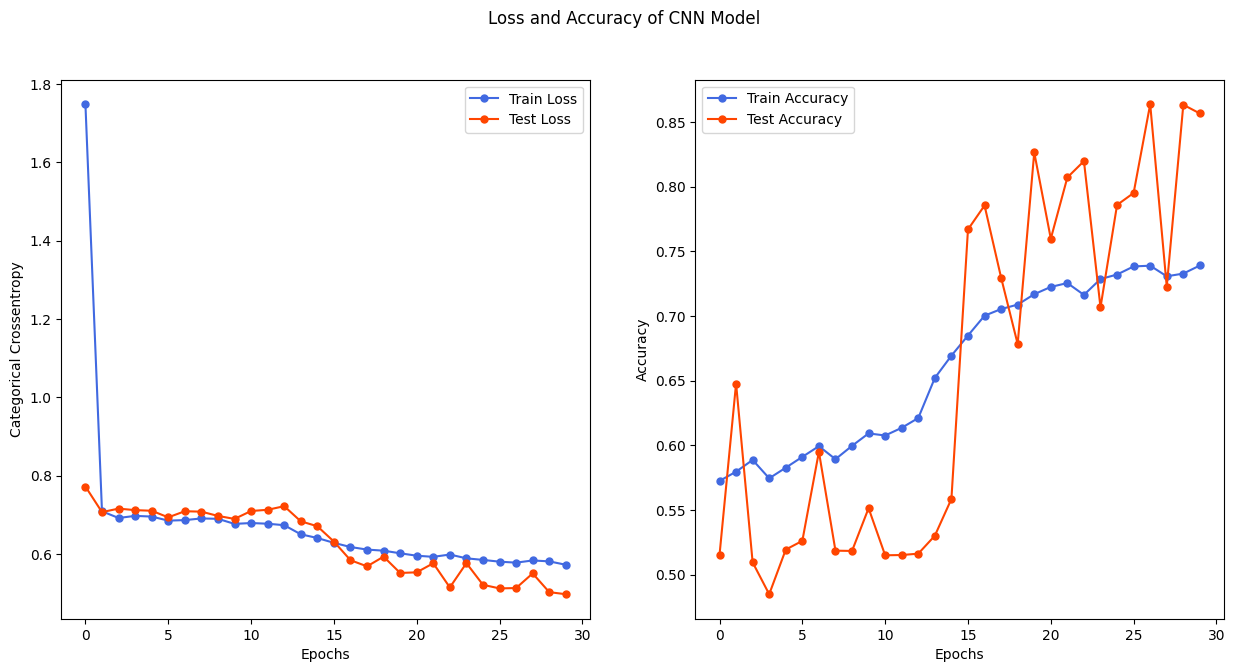

In [ ]:
# Plotting a line chart to visualize the loss and accuracy values by epochs.

fig, ax = plt.subplots(ncols=2, figsize=(15,7))

ax[0].plot(train_loss, label='Train Loss', color='royalblue', marker='o', markersize=5)
ax[0].plot(val_loss, label='Test Loss', color='orangered', marker='o', markersize=5)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Categorical Crossentropy')
ax[0].legend()

ax[1].plot(train_accuracy, label='Train Accuracy', color='royalblue', marker='o', markersize=5)
ax[1].plot(val_accuracy, label='Test Accuracy', color='orangered', marker='o', markersize=5)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

fig.suptitle("Loss and Accuracy of CNN Model")
plt.show()

confushion matrix


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

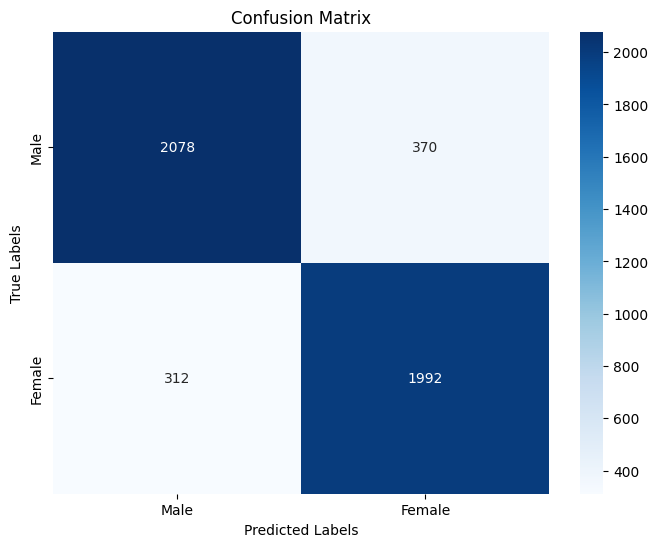

In [ ]:
# Assuming y_test and y_pred_classes are defined from your previous code

cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Male", "Female"], #["Predicted 0", "Predicted 1"]
            yticklabels=["Male", "Female"])       #["Actual 0", "Actual 1"]
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()